<a href="https://colab.research.google.com/github/janasteinborn/MAT-421/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAT 421 Homework 2

Name: Jana Steinborn

# 17.1 Interpolation Problem Statement

Interpolation is a mathematical method used to estimate the value of a function $f(x)$ at a point $x$ within the range of known data points. Given a set of data points $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$, where $y_i = f(x_i)$, interpolation involves constructing a function $g(x)$ such that $g(x_i) = y_i$ for all $i$. The function $g(x)$ can take different forms, such as linear, polynomial, or spline-based, depending on the desired level of accuracy and smoothness. Interpolation assumes that the function $f(x)$ behaves predictably between the given points, allowing $g(x)$ to approximate $f(x)$ within the interval of the data.


# 17.2 Linear Interpolation

Linear interpolation is one of the simplest forms of interpolation. It approximates
unknown values between two known points using a straight line. The formula is:

\[
$y = y_1 + \frac{(x - x_1) (y_2 - y_1)}{x_2 - x_1}$
\]

### Example: Linear Interpolation
Given two points:
- At x = 1: y = 2
- At x = 4: y = 8

The following Python code estimates the value of y when x = 2.5 using linear interpolation.

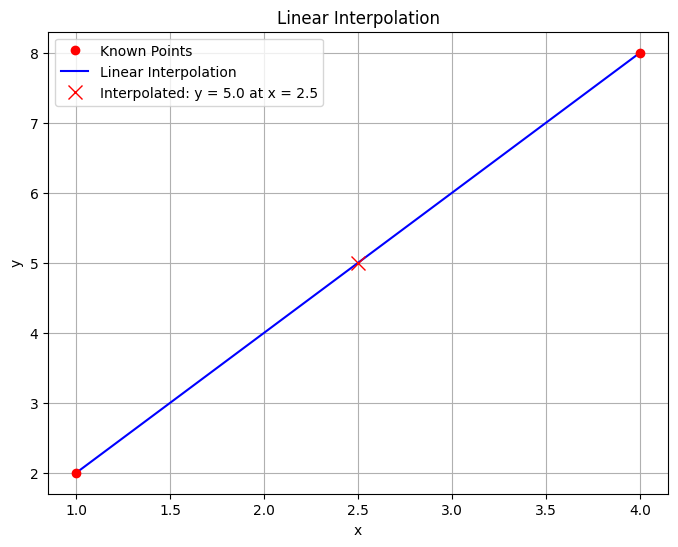

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_points = [1, 4]
y_points = [2, 8]

# Interpolation function
def linear_interpolate(x, x_points, y_points):
    x1, x2 = x_points
    y1, y2 = y_points
    return y1 + (x - x1) * (y2 - y1) / (x2 - x1)

# Interpolate at x = 2.5
x_interp = 2.5
y_interp = linear_interpolate(x_interp, x_points, y_points)

x_fine = np.linspace(min(x_points), max(x_points), 500)
y_fine = np.interp(x_fine, x_points, y_points)

plt.figure(figsize=(8, 6))
plt.plot(x_points, y_points, 'ro', label='Known Points', zorder=5)  # Known data points
plt.plot(x_fine, y_fine, 'b-', label='Linear Interpolation')         # Interpolation line
plt.plot(x_interp, y_interp, 'rx', label=f'Interpolated: y = {y_interp:.1f} at x = {x_interp}', markersize=10)  # Interpolated point
plt.title("Linear Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 17.3 Cubic Spline Interpolation

Cubic spline interpolation fits a smooth, continuous curve through a set of data points. It ensures smoothness at each data point and is more suitable for non-linear data compared to linear interpolation.

### Example: Oscillating Data
Given a dataset with oscillating values:
- At x = 0: y = 0
- At x = 1: y = 1
- At x = 2: y = 0
- At x = 3: y = 1
- At x = 4: y = 0
- At x = 5: y = 1

The following Python code visualizes how cubic spline interpolation creates a smooth curve through these points.


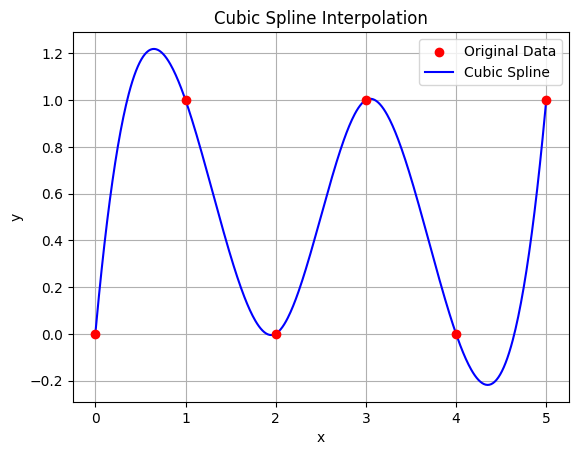

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 0, 1, 0, 1])

x_fine = np.linspace(x.min(), x.max(), 500)

cs = CubicSpline(x, y)
y_fine = cs(x_fine)

plt.scatter(x, y, color='red', label='Original Data', zorder=5)
plt.plot(x_fine, y_fine, label='Cubic Spline', color='blue', linestyle='-')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()